In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

### https://www.tutorialspoint.com/matplotlib/matplotlib_scatter_plot.htm
### https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv
### https://www.youtube.com/watch?v=eMOA1pPVUc4

In [2]:
df=pd.read_csv('D:\\EDA Practice\\Netflix Data\\netflix_titles.csv')
df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [3]:
#Check the missing values percentage?
import missingno
missingno.bar(df)

<AxesSubplot:>

In [4]:
# Taking only the first value for country when there are multiple values for a single row
# MY CODE <- df["country"]= df["country"].str.split(", ", n = 1, expand = True) 

# Code from https://www.kaggle.com/arnavbatla/netflix-eda
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [5]:
# Removing comma seprated countries 
df['country']=df['country'].str.split(',',n=1,expand=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [6]:
#Displaying TV Shows vs Movies in histogram
sns.countplot(x="type",data=df)


<AxesSubplot:label='38104f0c-832b-40eb-9d40-cd48c3bed412', xlabel='type', ylabel='count'>

In [7]:
# Identifying Unique values for all columns
#Making dictionary to display the output as column name: count of values
dict={}
#using in list to iterate through the column and df.column gives an output if all the column names
for i in list (df.columns):
    #value_countsused to get the unique values as kind of a list and shape is used to convert that list in numeric value
    #for example value counts for rating gives different ratings and their count but adding shape 0 just gived number 14
    dict[i]=df[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index=["Unique Count "]).transpose())

              Unique Count 
show_id                7787
type                      2
title                  7787
director               4049
cast                   6831
country                  81
date_added             1565
release_year             73
rating                   14
duration                216
listed_in               492
description            7769


C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


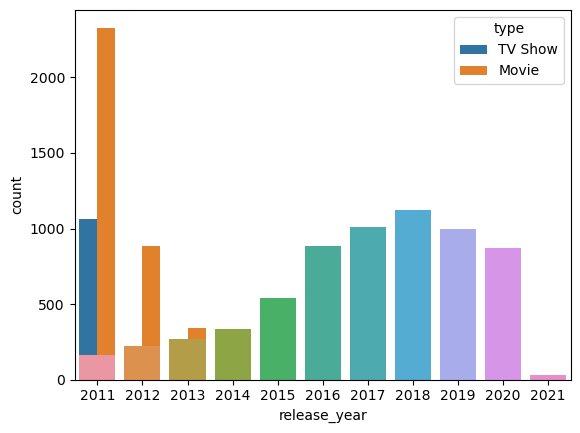

In [19]:
#Yearly count of tv shows and movies
df = df.loc[(df['release_year']>2010 & (df['type']=="Movie"))]
sns.countplot(df['release_year'])
plt.show()


In [9]:
# Missing Values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country            0
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# Top 10 countries
x1 = df['country'].value_counts().head(10)
top10 = pd.DataFrame(x1 , columns = ['country'])
top10
sns.countplot(x="country",hue="type",data=df,order=df.country.value_counts().iloc[:10].index)


<AxesSubplot:xlabel='country', ylabel='count'>

In [11]:
#Facet of movies and graph in top 3 countries
df["duration"] = df["duration"].apply(lambda x: x.split(" ")[0])
#df['duration'].astype('int64')
df = df.loc[(df['release_year']>2010)]
#df.info()

#temp_dfx=df['country'].value_counts().head(3)
# temp_df=pd.DataFrame(temp_dfx)
# print(temp_df)

df.nlargest(3,'release_year')

# graph = sns.FacetGrid(df, col ="type",  hue ="release_year")
# graph.map(plt.scatter, "type", "", edgecolor ="w").add_legend()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
980,s981,TV Show,Bling Empire,NaN,NaN,United States,"January 15, 2021",2021,TV-MA,1,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...
1222,s1223,TV Show,Carmen Sandiego,NaN,"Gina Rodriguez, Finn Wolfhard, Abby Trott, Mic...",United States,"January 15, 2021",2021,TV-Y7,4,"Kids' TV, TV Thrillers","A master thief who uses her skills for good, C..."
1285,s1286,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...",Canada,"January 8, 2021",2021,TV-Y7,85,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri..."


In [12]:
#Unique Genres
# Method 1: Gives a fine output
list1=[]
for i in list(df['rating'].unique()):
    print(i)

#Method 2: Gives output as a list
#print(df['rating'].unique())


TV-MA
R
TV-14
TV-PG
NR
TV-G
TV-Y
nan
PG-13
TV-Y7
PG
G
NC-17
TV-Y7-FV
UR


In [32]:
x1=df['rating']
#y=df['duration'].astype('int32')
#df["duration"]. astype(str). astype(int)

df['rating']=df['rating'].fillna(0)
df.duration.astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6437 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6437 non-null   object
 1   type          6437 non-null   object
 2   title         6437 non-null   object
 3   director      4264 non-null   object
 4   cast          5758 non-null   object
 5   country       6437 non-null   object
 6   date_added    6437 non-null   object
 7   release_year  6437 non-null   int64 
 8   rating        6437 non-null   object
 9   duration      6437 non-null   object
 10  listed_in     6437 non-null   object
 11  description   6437 non-null   object
dtypes: int64(1), object(11)
memory usage: 973.8+ KB
